In [1]:
# importing required libraries
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from math import exp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
# load data
gold_price  = pd.read_csv("\\Users\\piyus\\Documents\\ExcelR project\\P99\\GoldPrice.csv")
gold_price.head()

,Date,Gold_Price
0,04-03-2020,38782
1,05-03-2020,39246
2,06-03-2020,40061
3,09-03-2020,39971
4,10-03-2020,39570


In [3]:
# shape 
gold_price.shape

(523, 2)

In [4]:
# length of data
len(gold_price.Gold_Price.unique())

501

In [5]:
# Na values
gold_price.isna().sum()

Date          0
Gold_Price    0
dtype: int64

In [6]:
# DataType
gold_price.dtypes

Date          object
Gold_Price     int64
dtype: object

In [7]:
# converting Date column into DateTime datatype

gold_price['Date'] = pd.to_datetime(gold_price['Date'], format="%d-%m-%Y")
gold_price.head()

,Date,Gold_Price
0,2020-03-04,38782
1,2020-03-05,39246
2,2020-03-06,40061
3,2020-03-09,39971
4,2020-03-10,39570


In [8]:
gold_price.dtypes

Date          datetime64[ns]
Gold_Price             int64
dtype: object

In [9]:
#setting Date as index
gold_price.set_index(gold_price.Date,inplace=True)
gold_price = gold_price.drop(['Date'],axis=1)
gold_price.head()

,Gold_Price
Date,
2020-03-04,38782
2020-03-05,39246
2020-03-06,40061
2020-03-09,39971
2020-03-10,39570


####  As the in our data Date range is having Business frequency so the dates of Sundays and Saturdays are missing in data

In [10]:
#Adding missing dates and  respective gold price

new_date = pd.date_range(start="2020-03-04",end="2022-03-04",freq="D")
gold_price=gold_price.reindex(new_date)
gold_price.head()

,Gold_Price
2020-03-04,38782.0
2020-03-05,39246.0
2020-03-06,40061.0
2020-03-07,NaN
2020-03-08,NaN


In [11]:
data = gold_price.resample('1D').mean().ffill()

In [12]:
data.head()

,Gold_Price
2020-03-04,38782.0
2020-03-05,39246.0
2020-03-06,40061.0
2020-03-07,40061.0
2020-03-08,40061.0


In [13]:
data1=data.copy()

In [14]:
data.describe()

,Gold_Price
count,731.000000
mean,43294.845417
std,1972.936243
min,35643.000000
25%,42316.000000
50%,43298.000000
75%,44487.000000
max,49968.000000


In [15]:
data.index

DatetimeIndex(['2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
               '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13',
               ...
               '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26',
               '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02',
               '2022-03-03', '2022-03-04'],
              dtype='datetime64[ns]', length=731, freq='D')

### Analysing Data With different Graps

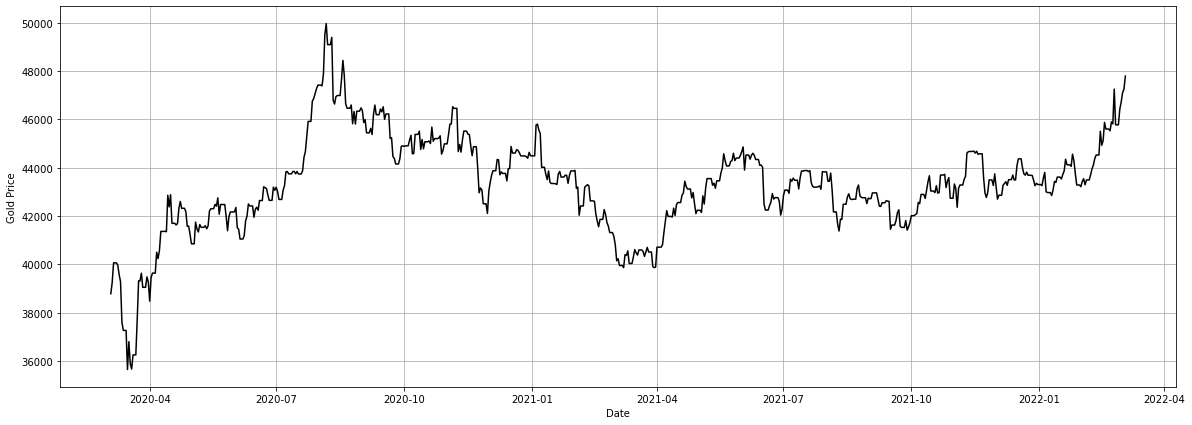

In [16]:
plt.figure(figsize=(20,7))
plt.plot(data,color='black')
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.grid()
plt.show()

  **Above lineplot shows that Gold Price over the period of time is increasing and after certain period it decresses again,therefore data is not showing any kind of trend and seasonality .

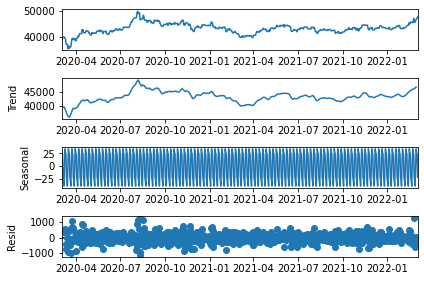

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(data)
decompose.plot()
plt.show()

**Seasonal demoposition shows that 
 1. avarage is not constant for the GoldPrice over the period of time
 2. there is no trend followed by data  
 3. seasonality is not present in the data

<AxesSubplot:ylabel='Density'>

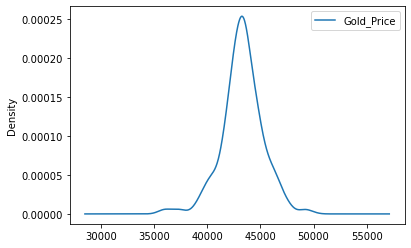

In [18]:
data.plot(kind='kde')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

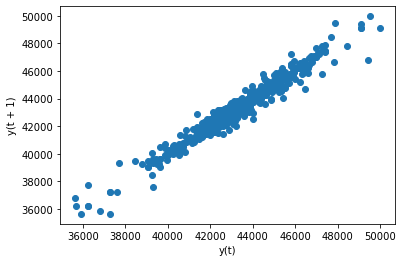

In [19]:
from pandas.plotting import lag_plot
lag_plot(data)

**lag plots shows that there is positive liner relation between variable and its own lag variable 

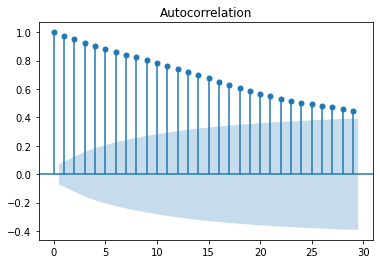

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)
plt.show()

**from the above graph we can examine that nearest time lag has good autocorrelation but as we reach time      period which are far away the autocorrelation is decressing

### Appying all transformation on data 

In [21]:
# SquareRoot Transformation

sqrt = pd.DataFrame()
sqrt['Gold_Price'] = np.sqrt(data['Gold_Price'])
sqrt1=sqrt.copy()

# Adding Columns i.e.. "time" , "time square" , and "Log of  SquareRoot gold price"

sqrt['time'] = np.arange(1,732)
sqrt['time_sqr'] = sqrt['time']*sqrt['time']
sqrt['log_GoldPrice'] = np.log(sqrt['Gold_Price'])

#spliting into Training and Testing
train_sqrt = sqrt.head(550)
test_sqrt = sqrt.iloc[550:]

train_sqrt.head()

,Gold_Price,time,time_sqr,log_GoldPrice
2020-03-04,196.931460,1,1,5.282856
2020-03-05,198.106032,2,4,5.288802
2020-03-06,200.152442,3,9,5.299079
2020-03-07,200.152442,4,16,5.299079
2020-03-08,200.152442,5,25,5.299079


In [22]:
# log Transformation

log = pd.DataFrame()
log['Gold_Price'] = np.log(data['Gold_Price'])
log1=log.copy()
# Adding Columns i.e.. "time" , "time square" , and "Log of  log gold price"

log['time'] = np.arange(1,732)
log['time_sqr'] = log['time']*log['time']
log['log_GoldPrice'] = np.log(log['Gold_Price'])

#spliting into Training and Testing
train_log = log.head(550)
test_log = log.iloc[550:]

train_log.head()

,Gold_Price,time,time_sqr,log_GoldPrice
2020-03-04,10.565712,1,1,2.357614
2020-03-05,10.577605,2,4,2.358739
2020-03-06,10.598159,3,9,2.360680
2020-03-07,10.598159,4,16,2.360680
2020-03-08,10.598159,5,25,2.360680


In [23]:
# box-cox transform
result, lmbda = boxcox(data['Gold_Price'])
boxcox = pd.DataFrame(result, columns=['Gold_Price'])
dt = pd.date_range(start="2020-03-04",end="2022-03-04",freq="D")
boxcox['Date'] = dt
boxcox.set_index(boxcox.Date,inplace=True)
boxcox = boxcox.drop(['Date'],axis=1)
boxcox1=boxcox.copy()
# Adding Columns i.e.. "time" , "time square" , and "Log of  boxcox gold price"

boxcox['time'] = np.arange(1,732)
boxcox['time_sqr'] = boxcox['time']*boxcox['time']
boxcox['log_GoldPrice'] = np.log(boxcox['Gold_Price'])

#spliting into Training and Testing
train_boxcox = boxcox.head(550)
test_boxcox = boxcox.iloc[550:]

train_boxcox.head()

,Gold_Price,time,time_sqr,log_GoldPrice
Date,,,,
2020-03-04,2.613309e+11,1,1,26.289053
2020-03-05,2.694669e+11,2,4,26.319711
2020-03-06,2.841290e+11,3,9,26.372694
2020-03-07,2.841290e+11,4,16,26.372694
2020-03-08,2.841290e+11,5,25,26.372694


In [24]:
rec=np.reciprocal(data.Gold_Price)
recipro=pd.DataFrame(rec,columns=['Gold_Price'])
recipro1=recipro.copy()

# Adding Columns i.e.. "time" , "time square" , and "Log of  reciprocal gold price"

recipro['time'] = np.arange(1,732)
recipro['time_sqr'] = recipro['time']*recipro['time']
recipro['log_GoldPrice'] = np.log(recipro['Gold_Price'])

#spliting into Training and Testing
train_recipro = recipro.head(550)
test_recipro = recipro.iloc[550:]

train_recipro.head()

,Gold_Price,time,time_sqr,log_GoldPrice
2020-03-04,0.000026,1,1,-10.565712
2020-03-05,0.000025,2,4,-10.577605
2020-03-06,0.000025,3,9,-10.598159
2020-03-07,0.000025,4,16,-10.598159
2020-03-08,0.000025,5,25,-10.598159


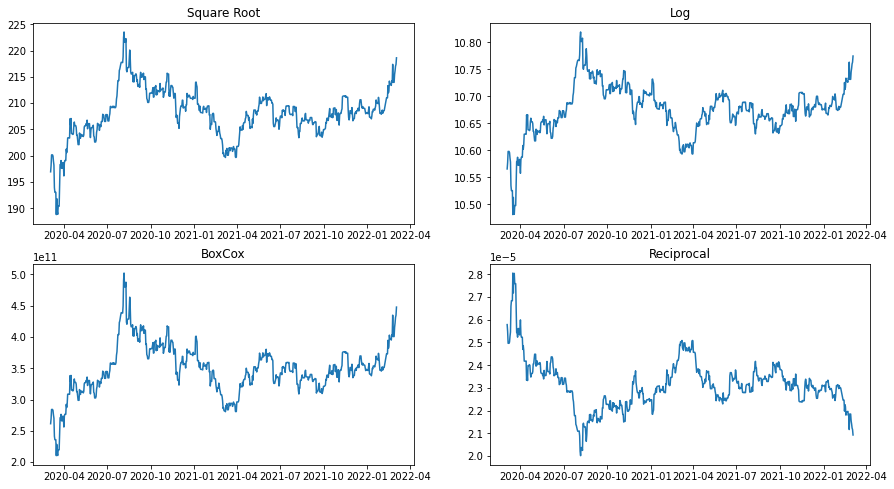

In [25]:
plt.figure(figsize=(15,17))
plt.subplot(4,2,1)
plt.plot(sqrt['Gold_Price'])
plt.title("Square Root")
plt.subplot(4,2,2)
plt.plot(log['Gold_Price'])
plt.title("Log")
plt.subplot(4,2,3)
plt.plot(boxcox['Gold_Price'])
plt.title("BoxCox")
plt.subplot(4,2,4)
plt.plot(recipro['Gold_Price'])
plt.title("Reciprocal")
plt.show()

In [26]:
# Adding Columns i.e.. "time" , "time square" , and "Log of  gold price"
data['time'] = np.arange(1,732)
data['time_sqr'] = data['time']*data['time']
data['log_GoldPrice'] = np.log(data['Gold_Price'])


# Spliting Original Data into Training and Testing set
train_data = data.head(550)
test_data = data.iloc[550:]
train_data.head()

,Gold_Price,time,time_sqr,log_GoldPrice
2020-03-04,38782.0,1,1,10.565712
2020-03-05,39246.0,2,4,10.577605
2020-03-06,40061.0,3,9,10.598159
2020-03-07,40061.0,4,16,10.598159
2020-03-08,40061.0,5,25,10.598159


#### Function to build model on "Naives Aproch ", " Simple Average "," Moving Average ".

In [27]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

def error1 (train,test):
    moddel = {
        'Naive Approch': {
            'model' : np.asarray(train.Gold_Price)[len(np.asarray(train.Gold_Price))-1]
        },
        'Simple Mean' :{
            'model' : train['Gold_Price'].mean()
        },
        'Moving Average': {
            'model': train['Gold_Price'].rolling(2).mean().iloc[-1]
        }
    }
    
    scores = []
    for model_name,config in moddel.items():
        gs = config['model']
        scores.append({
            'Model' : model_name,
            'Result' : np.mean(np.abs((gs-test.Gold_Price)/test.Gold_Price)*100)
        })
    return pd.DataFrame(scores,columns=['Result'])

In [28]:
model_name = ["Naives Aproch ", " Simple Average "," Moving Average"]
Result = pd.DataFrame(model_name,columns=['Model'])
Result['original_error'] = error1(train_data,test_data)
Result['sqrt_error'] = error1(train_sqrt,test_sqrt)
Result['log_error'] = error1(train_log,test_log)
Result['boxcox_error'] = error1(train_boxcox,test_boxcox)
Result['reciprocal_error'] = error1(train_recipro,test_recipro)
Result

,Model,original_error,sqrt_error,log_error,boxcox_error,reciprocal_error
0,Naives Aproch,2.139631,1.078216,0.203148,5.385734,2.209443
1,Simple Average,1.950153,0.989501,0.187919,4.843023,2.080878
2,Moving Average,2.139631,1.078216,0.203148,5.385734,2.209443


### Function to build model on "Simple Exponential ", " Holts " "ExponentialSmoothing".

In [29]:
from statsmodels.tsa.api import SimpleExpSmoothing,Holt,ExponentialSmoothing

def error2 (train,test):
    moddel={
        'Simple Exponential':{
            'model': SimpleExpSmoothing(np.asarray(train['Gold_Price'])).fit(smoothing_level=0.9)
        },
        'Holt':{
            'model': Holt(np.asarray(train['Gold_Price'])).fit(smoothing_level=0.1,smoothing_trend=0.1)
        },
        'ExponentialSmoothing':{
            'model' : ExponentialSmoothing(np.asarray(train['Gold_Price']),seasonal="add",trend="add",seasonal_periods=60).fit()
        }
    }
    scores = []
    for model_name,config in moddel.items():
        gs = config['model']
        pred = gs.forecast(len(test))
        scores.append({
            'Model': model_name,
            'Result': np.mean(np.abs((pred-test.Gold_Price)/test.Gold_Price)*100)
        })
        
    return pd.DataFrame(scores,columns=['Result'])

In [30]:
warnings.filterwarnings("ignore")

moddel__name = ["Simple Exponential","Holt","ExponentialSmoothing"]
Result_ = pd.DataFrame(moddel__name,columns=['Model'])
Result_['original_error'] = error2(train_data,test_data)
Result_['sqrt_error'] = error2(train_sqrt,test_sqrt)
Result_['log_error'] = error2(train_log,test_log)
Result_['boxcox_error'] = error2(train_boxcox,test_boxcox)
Result_['reciprocal_error'] = error2(train_recipro,test_recipro)
Result_


,Model,original_error,sqrt_error,log_error,boxcox_error,reciprocal_error
0,Simple Exponential,2.142138,1.079500,0.203394,5.391715,2.212202
1,Holt,1.449310,0.724023,0.135253,3.755801,1.445219
2,ExponentialSmoothing,8.531602,0.870422,0.163546,18.710011,9.873709


### Function to build model on "Simple Liner model ", " Exponential Linear model ".

In [31]:
import statsmodels.formula.api as smf

def error3 (train,test):
    mooodel={
        "Simple Liner model" :{
            'model': smf.ols('Gold_Price~time',data=train).fit()
        },
        "Exponential Linear model" :{
            'model': smf.ols('log_GoldPrice~time',data=train).fit()
        }
    }
    scores = []
    for moddel_name, config in mooodel.items():
        gs =  config['model']
        pred = pd.Series(gs.predict(test["time"]))
        scores.append({
            'model': moddel_name,
            'result':  np.mean(np.abs((pred-test.Gold_Price)/test.Gold_Price)*100)
        })
    return pd.DataFrame(scores,columns=['result'])

In [32]:
moddel_name_ = ["Simple Liner model","Exponential Linear model"]
Result_1= pd.DataFrame(moddel_name_,columns=['Model'])
Result_1['original_error'] = error3(train_data,test_data)
Result_1['sqrt_error'] = error3(train_sqrt,test_sqrt)
Result_1['log_error'] = error3(train_log,test_log)
Result_1['boxcox_error'] = error3(train_boxcox,test_boxcox)
Result_1['reciprocal_error'] = error3(train_recipro,test_recipro)
Result_1

,Model,original_error,sqrt_error,log_error,boxcox_error,reciprocal_error
0,Simple Liner model,1.979933,0.996296,0.187866,5.021027,2.038199e+00
1,Exponential Linear model,99.975450,97.439051,77.820650,100.000000,4.656181e+07


# ARIMA

### Function for adfuller test

In [33]:
from statsmodels.tsa.stattools import adfuller
def test_adfuller(data):
     adf_test = adfuller(data, autolag = 'AIC')
     print("1. ADF : ",adf_test[0])
     print("2. P-Value : ", adf_test[1])
     print("3.  Lags : ", adf_test[2])
     print("4. Num Of Observations :",      adf_test[3])
     print("5. Critical Values :")
     for key, val in adf_test[4].items():
         print("\t",key, ": ", val)

In [34]:
test_adfuller(data['Gold_Price'])

1. ADF :  -2.7169135993551143
2. P-Value :  0.07115692842042405
3.  Lags :  0
4. Num Of Observations : 730
5. Critical Values :
	 1% :  -3.4393396487377155
	 5% :  -2.865507363200066
	 10% :  -2.5688826684180897


In [35]:
test_adfuller(sqrt['Gold_Price'])

1. ADF :  -2.7481143344307015
2. P-Value :  0.0660759770448181
3.  Lags :  0
4. Num Of Observations : 730
5. Critical Values :
	 1% :  -3.4393396487377155
	 5% :  -2.865507363200066
	 10% :  -2.5688826684180897


In [36]:
test_adfuller(log['Gold_Price'])

1. ADF :  -2.7827234857631193
2. P-Value :  0.06078428704976459
3.  Lags :  0
4. Num Of Observations : 730
5. Critical Values :
	 1% :  -3.4393396487377155
	 5% :  -2.865507363200066
	 10% :  -2.5688826684180897


In [37]:
test_adfuller(boxcox['Gold_Price'])

1. ADF :  -2.6421679549925083
2. P-Value :  0.08459136479328577
3.  Lags :  0
4. Num Of Observations : 730
5. Critical Values :
	 1% :  -3.4393396487377155
	 5% :  -2.865507363200066
	 10% :  -2.5688826684180897


In [38]:
test_adfuller(recipro['Gold_Price'])

1. ADF :  -2.861650999446174
2. P-Value :  0.049992659736322935
3.  Lags :  0
4. Num Of Observations : 730
5. Critical Values :
	 1% :  -3.4393396487377155
	 5% :  -2.865507363200066
	 10% :  -2.5688826684180897


From adfuller test we came to know that reciprocal Transformation is givig least p_values so we will build arima model on Reciprocal Transformation

In [39]:
# auto arima to get best p,d,q

from pmdarima import auto_arima
show_fit = auto_arima(recipro['Gold_Price'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-15433.778, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16048.376, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16046.372, Time=0.64 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15933.166, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17453.249, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16408.873, Time=0.84 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.866 seconds


In [40]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(recipro['Gold_Price'],order=(0,1,0))
model=model.fit()
warnings.filterwarnings("ignore")

In [41]:
start=len(recipro.Gold_Price)
end=len(recipro.Gold_Price)-1
pred2_=model.predict(start=1,end=800,typ='levels').rename('ARIMA Predictions')
np.mean(np.abs((pred2_-data.Gold_Price)/data.Gold_Price)*100)

99.99999994632606

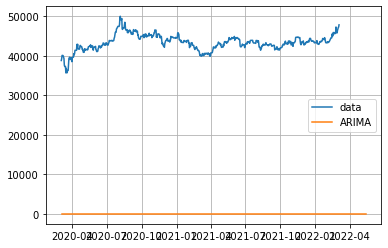

In [42]:
plt.plot(data['Gold_Price'], label='data')
plt.plot(pred2_, label='ARIMA')
plt.legend(loc='best')
plt.grid()
plt.show()

In [43]:
FinalResult = pd.concat([Result,Result_,Result_1],axis=0)
FinalResult.reset_index(drop=True,inplace=True)
FinalResult

,Model,original_error,sqrt_error,log_error,boxcox_error,reciprocal_error
0,Naives Aproch,2.139631,1.078216,0.203148,5.385734,2.209443e+00
1,Simple Average,1.950153,0.989501,0.187919,4.843023,2.080878e+00
2,Moving Average,2.139631,1.078216,0.203148,5.385734,2.209443e+00
3,Simple Exponential,2.142138,1.079500,0.203394,5.391715,2.212202e+00
4,Holt,1.449310,0.724023,0.135253,3.755801,1.445219e+00
5,ExponentialSmoothing,8.531602,0.870422,0.163546,18.710011,9.873709e+00
6,Simple Liner model,1.979933,0.996296,0.187866,5.021027,2.038199e+00
7,Exponential Linear model,99.975450,97.439051,77.820650,100.000000,4.656181e+07


                             Holts metod has given least error with LogTransformation .
As Holts metod has given least error as compare to other model so we decided to go with Holts  Method.
But After building the model on Holts method we find that data is overfitted therefore we finallies Exponential Smooting as our final model

In [44]:
## final model

In [45]:
# ExponentialSmoothing method 
ES =ExponentialSmoothing((log['Gold_Price']),seasonal="add",trend="add",seasonal_periods=730).fit()
pred_ES = ES.predict(start = log.index[0],end = log.index[-1])
np.mean(np.abs((pred_ES-log.Gold_Price)/log.Gold_Price)*100)

0.0017562589685081607

In [46]:
data['Forecast']=np.exp(pred_ES)
data.head()

,Gold_Price,time,time_sqr,log_GoldPrice,Forecast
2020-03-04,38782.0,1,1,10.565712,38776.875146
2020-03-05,39246.0,2,4,10.577605,39234.661490
2020-03-06,40061.0,3,9,10.598159,40058.485421
2020-03-07,40061.0,4,16,10.598159,40053.841443
2020-03-08,40061.0,5,25,10.598159,40055.341762


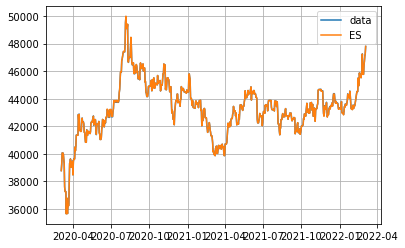

In [47]:


plt.plot(data['Gold_Price'], label='data')
plt.plot(data['Forecast'], label='ES')
plt.legend(loc='best')
plt.grid()
plt.show()

In [48]:
np.exp(ES.forecast(30))

2022-03-05    48366.224234
2022-03-06    49382.978671
2022-03-07    49389.180494
2022-03-08    49397.283634
2022-03-09    49293.746793
2022-03-10    48804.069754
2022-03-11    48461.232948
2022-03-12    46388.366586
2022-03-13    45970.655098
2022-03-14    45970.000824
2022-03-15    45970.208336
2022-03-16    43975.321846
2022-03-17    45401.479873
2022-03-18    44286.908451
2022-03-19    44011.168420
2022-03-20    44739.369042
2022-03-21    44743.045959
2022-03-22    44746.865938
2022-03-23    46545.468514
2022-03-24    48536.230208
2022-03-25    48525.776571
2022-03-26    48919.302768
2022-03-27    48190.927134
2022-03-28    48183.634519
2022-03-29    48178.362788
2022-03-30    48704.209955
2022-03-31    48439.454911
2022-04-01    47460.615480
2022-04-02    48665.790234
2022-04-03    48879.038883
Freq: D, dtype: float64

In [49]:
#Rnn model .

In [50]:
train_11=log1.head(550)
test_11=log1.iloc[550:]
train_11.head()

,Gold_Price
2020-03-04,10.565712
2020-03-05,10.577605
2020-03-06,10.598159
2020-03-07,10.598159
2020-03-08,10.598159


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [52]:
scale.fit(train_11)
scaled_train = scale.transform(train_11)
scaled_test = scale.transform(test_11)


In [53]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [54]:
n_input = 4
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [55]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(generator,epochs=16)

Epoch 1/16
546/546 [==============================] - 3s 3ms/step - loss: 0.0132
Epoch 2/16
546/546 [==============================] - 2s 3ms/step - loss: 0.0022
Epoch 3/16
546/546 [==============================] - 2s 3ms/step - loss: 0.0022
Epoch 4/16
546/546 [==============================] - 2s 3ms/step - loss: 0.0020
Epoch 5/16
546/546 [==============================] - 2s 3ms/step - loss: 0.0017
Epoch 6/16
546/546 [==============================] - 2s 3ms/step - loss: 0.0016
Epoch 7/16
546/546 [==============================] - 2s 4ms/step - loss: 0.0016
Epoch 8/16
546/546 [==============================] - 2s 3ms/step - loss: 0.0015
Epoch 9/16
546/546 [==============================] - 2s 3ms/step - loss: 0.0015
Epoch 10/16
546/546 [==============================] - 2s 4ms/step - loss: 0.0013
Epoch 11/16
546/546 [==============================] - 2s 3ms/step - loss: 0.0014
Epoch 12/16
546/546 [==============================] - 2s 3ms/step - loss: 0.0012
Epoch 13/16
546/546 [====

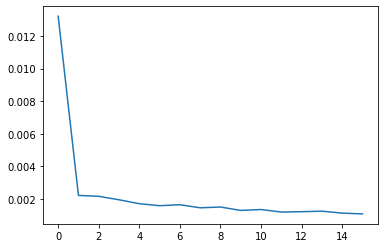

In [56]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [57]:
last_train_batch = scaled_train[-4:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

scaled_test[0]

array([0.55234961])

In [58]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_11)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [59]:
true_predictions = scale.inverse_transform(test_predictions)

In [60]:
train_12=data1.head(550)
test_12=data1.iloc[550:]
train_12.head()

,Gold_Price
2020-03-04,38782.0
2020-03-05,39246.0
2020-03-06,40061.0
2020-03-07,40061.0
2020-03-08,40061.0


In [61]:
test_12['Predictions'] = true_predictions
test_12['Predictions']=np.exp(test_12['Predictions'])

test_12.head()

,Gold_Price,Predictions
2021-09-05,42955.0,42719.236648
2021-09-06,42957.0,42543.144203
2021-09-07,42687.0,42360.249443
2021-09-08,42407.0,42189.428084
2021-09-09,42398.0,42027.867975


In [62]:
result = np.abs((test_12['Predictions']-test_12.Gold_Price)/test_12.Gold_Price)*100
print( np.mean(result))

9.519325551680584


In [63]:
### As Rmse score wirh rnn was high as compare to exponential smooting method ... so our final model will be EXponential model.

In [64]:
import pickle
filename = 'C:/Users/piyus/GoldPrice_forecast.sav'
pickle.dump(ES, open(filename, 'wb'))

In [65]:
with open('C:/Users/piyus/GoldPrice_forecast.pickle','wb') as f:
    pickle.dump(ES,f)

In [68]:
final_df = data1
final_df.to_pickle("C:/Users/piyus/GoldPriceforecast.pickle")
final_df.to_csv("C:/Users/piyus/gold_Cleaned_data.csv")